In [1]:
import os
import numpy as np
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing import image
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Data directories
train_dir = '/content/drive/MyDrive/DR_50/Train'
test_dir = '/content/drive/MyDrive/DR_50/Test'
valid_dir = '/content/drive/MyDrive/DR_50/Valid'
# Image dimensions
img_width, img_height = 300, 300  # Adjust according to your image dimensions
batch_size = 32
num_epochs = 20


In [3]:
# Load model for feature extraction
model = InceptionV3(weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 0s 0us/step


In [4]:
# Function to extract features from an image
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(299, 299))  # InceptionV3 requires input size of 299x299
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)  # Preprocess input for InceptionV3
    features = model.predict(img_data)
    return features


In [5]:
# Load images and extract features for training set
x_train, y_train = [], []
for i in range(5):
    class_dir = os.path.join(train_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features(os.path.join(class_dir, img_path))
        x_train.append(features.flatten())
        y_train.append(i)


1/1 [==============================] - 0s 240ms/step


In [6]:
# Load images and extract features for test set
x_test, y_test = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features(os.path.join(class_dir, img_path))
        x_test.append(features.flatten())
        y_test.append(i)

1/1 [==============================] - 0s 467ms/step


In [7]:
# Train GBM classifier
gbm = GradientBoostingClassifier()
gbm.fit(x_train, y_train)


GradientBoostingClassifier()

In [8]:
# Predict on test set
y_pred = gbm.predict(x_test)


In [9]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[3 0 0 1 1]
 [1 1 0 2 1]
 [1 0 3 0 1]
 [0 0 5 0 0]
 [0 0 0 0 5]]


In [10]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       1.00      0.20      0.33         5
           2       0.38      0.60      0.46         5
           3       0.00      0.00      0.00         5
           4       0.62      1.00      0.77         5

    accuracy                           0.48        25
   macro avg       0.52      0.48      0.43        25
weighted avg       0.52      0.48      0.43        25




Accuracy: 0.48
Precision: 0.52
Recall: 0.48
F1 Score: 0.43282051282051287


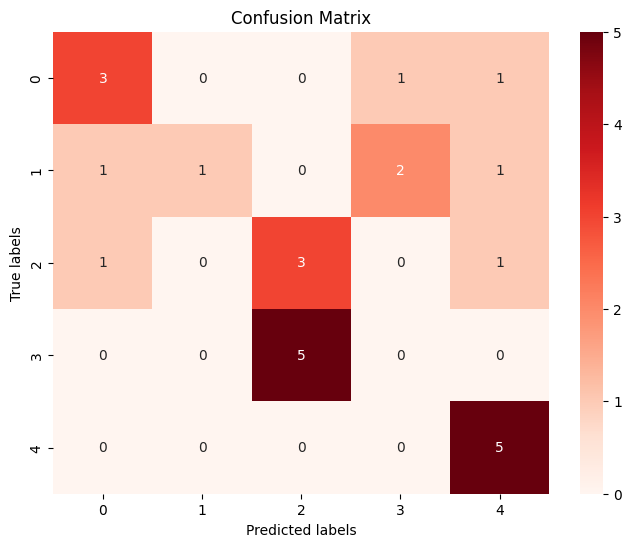

In [11]:
# Performance metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='g', xticklabels=[str(i) for i in range(5)], yticklabels=[str(i) for i in range(5)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()